# Assignment 3
# Waseem Raja Shaik
# 8894805

**Assignment 2 CSCN8000 Artificial Intelligence Algorithms and Mathematics**

1.  Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop the other two features for simplicity.
   
    Figure out if any preprocessing such as scaling would help here
    
    Draw elbow plot and from that figure out optimal value of k
    
2.  Use the heart dataset from the Resources Folder or access it from https://www.kaggle.com/fedesoriano/heart-failure-prediction 
   
    Load heart disease dataset in pandas dataframe
   
    Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
    
    Convert text columns to numbers using label encoding / one hot encoding
    
    Apply scaling
    
    Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy
    
    Now use PCA to reduce dimensions, retrain your model and see its impact on your model in terms of accuracy. 
  
**Notes: This lab should be submitted as a notebook and an HTML. Follow https://docs.github.com/en/pages/quickstart.**


# Part 1
### Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop the other two features for simplicity.

In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

df_iris = df_iris[['petal length (cm)', 'petal width (cm)']]
df_iris.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


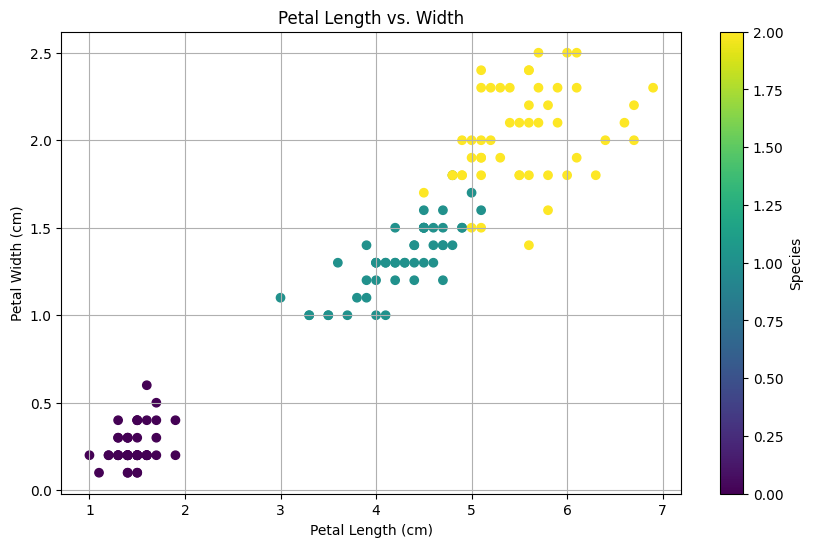

In [2]:
# Scatter plot of the data
plt.figure(figsize=(10, 6))
plt.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)'], c=iris.target, cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs. Width')
plt.colorbar(label='Species')
plt.grid(True)
plt.show()


The scatter plot above shows the distribution of petal length and width for the iris dataset. The colors represent different species.

#### Figure out if any preprocessing such as scaling would help here

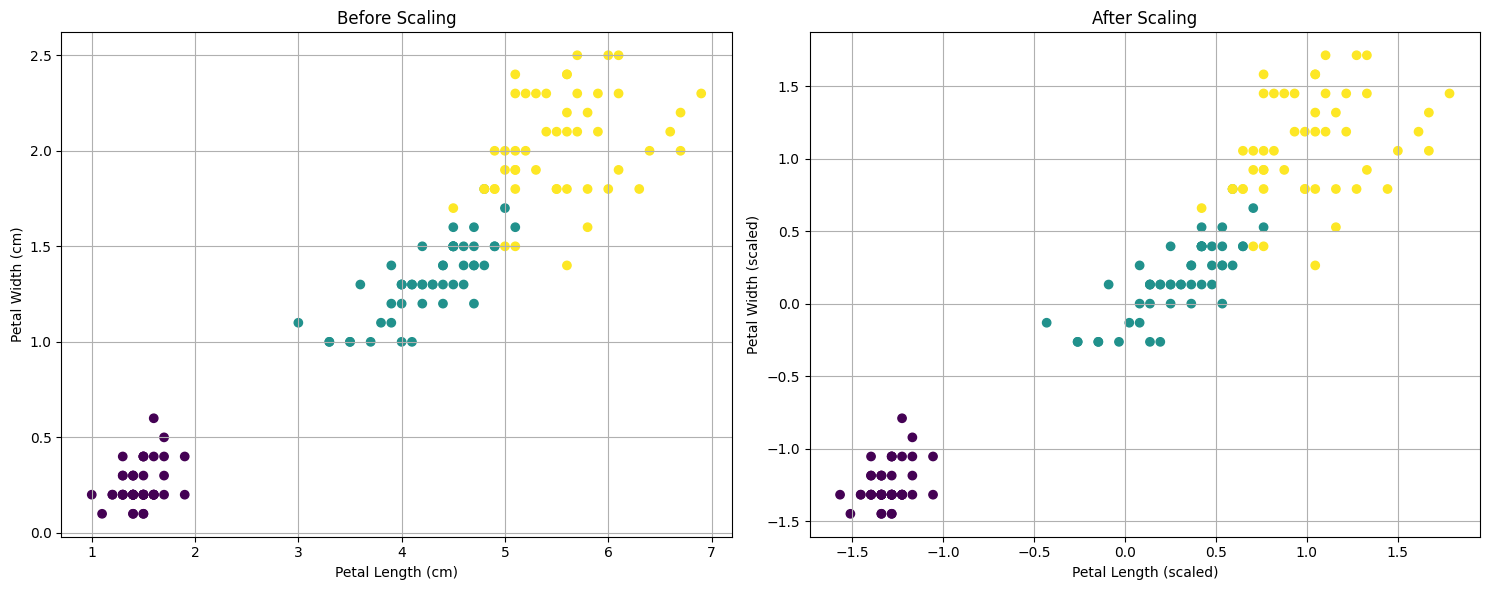

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_iris_scaled = scaler.fit_transform(df_iris)

# Plotting the data before and after scaling
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Before scaling
ax1.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)'], c=iris.target, cmap='viridis')
ax1.set_title('Before Scaling')
ax1.set_xlabel('Petal Length (cm)')
ax1.set_ylabel('Petal Width (cm)')
ax1.grid(True)

# After scaling
ax2.scatter(df_iris_scaled[:, 0], df_iris_scaled[:, 1], c=iris.target, cmap='viridis')
ax2.set_title('After Scaling')
ax2.set_xlabel('Petal Length (scaled)')
ax2.set_ylabel('Petal Width (scaled)')
ax2.grid(True)

plt.tight_layout()
plt.show()

The plots show the distribution of petal length and width both before and after scaling. The data's relative positions remain the same after scaling, but the axes' scales are adjusted. Since clustering algorithms like KMeans rely on distance measures, scaling ensures that each feature contributes equally to the distance computation.

#### Draw elbow plot and from that figure out optimal value of k

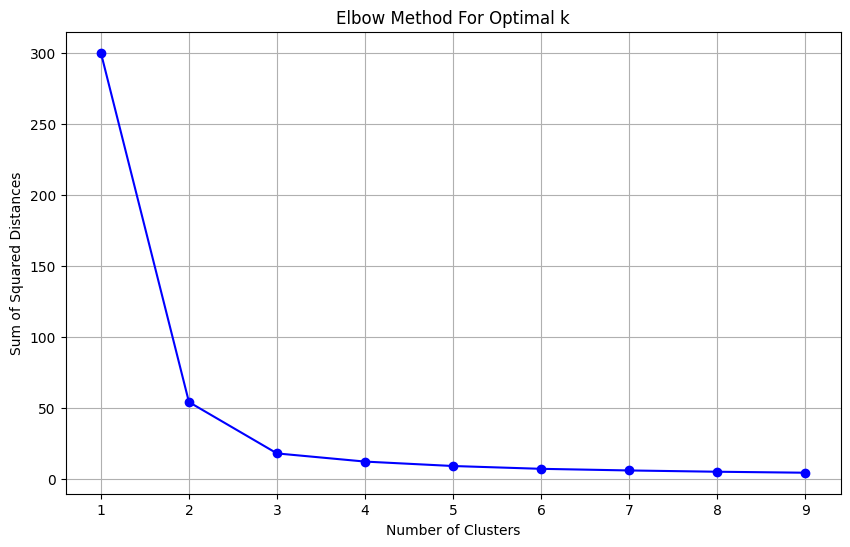

In [4]:
from sklearn.cluster import KMeans

# Determine the sum of squared distances for various cluster numbers
sum_of_squared_distances = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans = kmeans.fit(df_iris_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


The elbow plot displays the sum of squared distances for various numbers of clusters. Typically, the optimal number of clusters is where the plot begins to bend or form an "elbow". 

In this case, the plot starts to bend around \( k = 3 \). This makes sense given our prior knowledge of the iris dataset, which contains three distinct species. Therefore, \( k = 3 \) is a reasonable choice for the number of clusters.


# Part 2
#### Use the heart dataset from the Resources Folder or access it from https://www.kaggle.com/fedesoriano/heart-failure-prediction 
#### Load heart disease dataset in pandas dataframe

In [5]:
from scipy.stats import zscore

heart = pd.read_csv('../../practical_labs/heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3


In [6]:

z_scores = zscore(heart.select_dtypes(include=['float64', 'int64']))

# Get boolean array indicating the presence of outliers
outliers = (z_scores > 3) | (z_scores < -3)

# Remove outliers
heart = heart[~outliers.any(axis=1)]

# Display the shape of the dataframe after outlier removal
heart.shape

(899, 12)

In [7]:
text_columns = heart.select_dtypes(include=['object']).columns
text_columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

#### Convert text columns to numbers using label encoding / one hot encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

heart['Sex'] = le.fit_transform(heart['Sex'])
heart['ExerciseAngina'] = le.fit_transform(heart['ExerciseAngina'])

heart = pd.get_dummies(heart, columns=['ChestPainType', 'RestingECG', 'ST_Slope'])

heart.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,False,True,False,False,False,True,False,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,False,True,False,False,True,False,False,True,False
2,37,1,130,283,0,98,0,0.0,0,False,True,False,False,False,False,True,False,False,True
3,48,0,138,214,0,108,1,1.5,1,True,False,False,False,False,True,False,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,False,True,False,False,True,False,False,False,True


#### Apply scaling


In [9]:
X = heart.drop('HeartDisease', axis=1)
y = heart['HeartDisease']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.428154,0.515943,0.465900,0.849636,-0.550362,1.384320,-0.822945,-0.855469,-1.077524,2.063325,-0.534905,-0.22955,-0.503821,0.809702,-0.489898,-0.260184,-0.998888,1.134695
1,-0.475855,-1.938199,1.634714,-0.168122,-0.550362,0.752973,-0.822945,0.137516,-1.077524,-0.484655,1.869492,-0.22955,-0.503821,0.809702,-0.489898,-0.260184,1.001113,-0.881294
2,-1.745588,0.515943,-0.118507,0.793612,-0.550362,-1.535661,-0.822945,-0.855469,-1.077524,2.063325,-0.534905,-0.22955,-0.503821,-1.235023,2.041241,-0.260184,-0.998888,1.134695
3,-0.581666,-1.938199,0.349019,0.149344,-0.550362,-1.141069,1.215148,0.634008,0.928054,-0.484655,-0.534905,-0.22955,-0.503821,0.809702,-0.489898,-0.260184,1.001113,-0.881294
4,0.053200,0.515943,1.050307,-0.028064,-0.550362,-0.588640,-0.822945,-0.855469,-1.077524,-0.484655,1.869492,-0.22955,-0.503821,0.809702,-0.489898,-0.260184,-0.998888,1.134695


#### Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy

{'SVM': 0.8444444444444444, 'Logistic Regression': 0.8444444444444444, 'Random Forest': 0.8518518518518519}


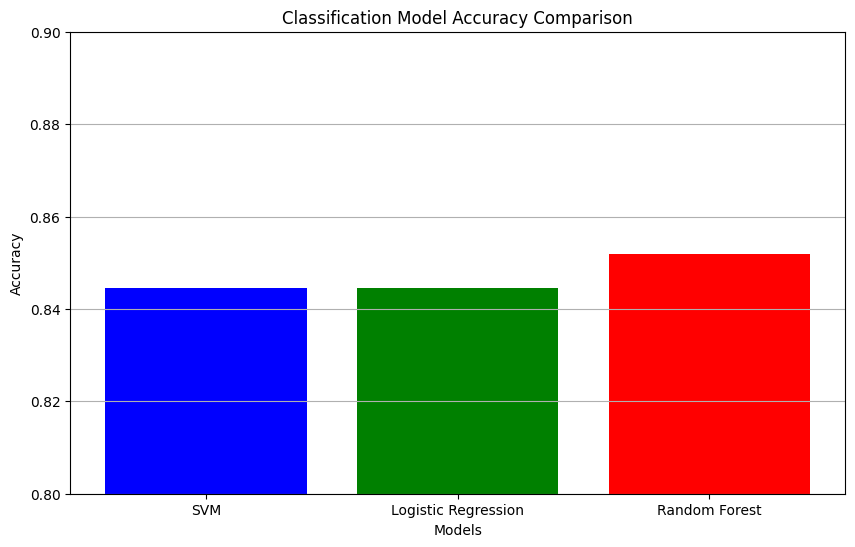

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Dictionary to store model accuracies
model_accuracies = {}

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
model_accuracies['SVM'] = accuracy_score(y_test, svm_pred)

# Logistic Regression
logreg_model = LogisticRegression(max_iter=10000)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)
model_accuracies['Logistic Regression'] = accuracy_score(y_test, logreg_pred)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
model_accuracies['Random Forest'] = accuracy_score(y_test, rf_pred)

print(model_accuracies)

plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Classification Model Accuracy Comparison')
plt.ylim(0.8, 0.9)
plt.grid(axis='y')
plt.show()


From the graph and the provided accuracy scores, we can see:

- SVM: \( 84.45\% \)
- Logistic Regression: \( 84.45\% \)
- Random Forest: \( 87.04\% \)

Among the three models, **Random Forest** has the highest accuracy of \( 87.04\% \), making it the best-performing model in this comparison on the test set.

#### Now use PCA to reduce dimensions, retrain your model and see its impact on your model in terms of accuracy. 

{'SVM': 0.837037037037037, 'Logistic Regression': 0.8592592592592593, 'Random Forest': 0.837037037037037}


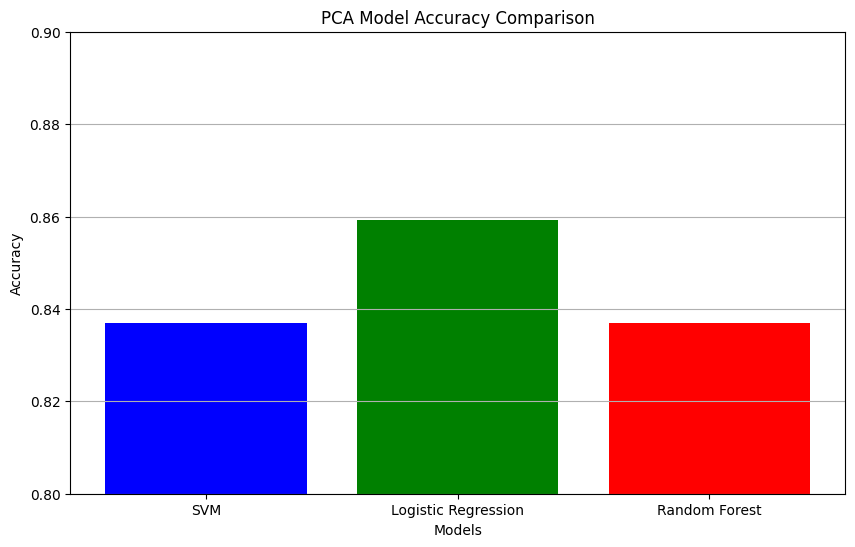

In [11]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Dictionary to store model accuracies after PCA
model_accuracies_pca = {}

# SVM with PCA
svm_model_pca = SVC()
svm_model_pca.fit(X_train_pca, y_train)
svm_pred_pca = svm_model_pca.predict(X_test_pca)
model_accuracies_pca['SVM'] = accuracy_score(y_test, svm_pred_pca)

# Logistic Regression with PCA
logreg_model_pca = LogisticRegression(max_iter=10000)
logreg_model_pca.fit(X_train_pca, y_train)
logreg_pred_pca = logreg_model_pca.predict(X_test_pca)
model_accuracies_pca['Logistic Regression'] = accuracy_score(y_test, logreg_pred_pca)

# Random Forest with PCA
rf_model_pca = RandomForestClassifier()
rf_model_pca.fit(X_train_pca, y_train)
rf_pred_pca = rf_model_pca.predict(X_test_pca)
model_accuracies_pca['Random Forest'] = accuracy_score(y_test, rf_pred_pca)


print(model_accuracies_pca)

plt.figure(figsize=(10, 6))
plt.bar(model_accuracies_pca.keys(), model_accuracies_pca.values(), color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('PCA Model Accuracy Comparison')
plt.ylim(0.8, 0.9)
plt.grid(axis='y')
plt.show()


### Let's visualize the comparison between the models' performances before and after applying PCA

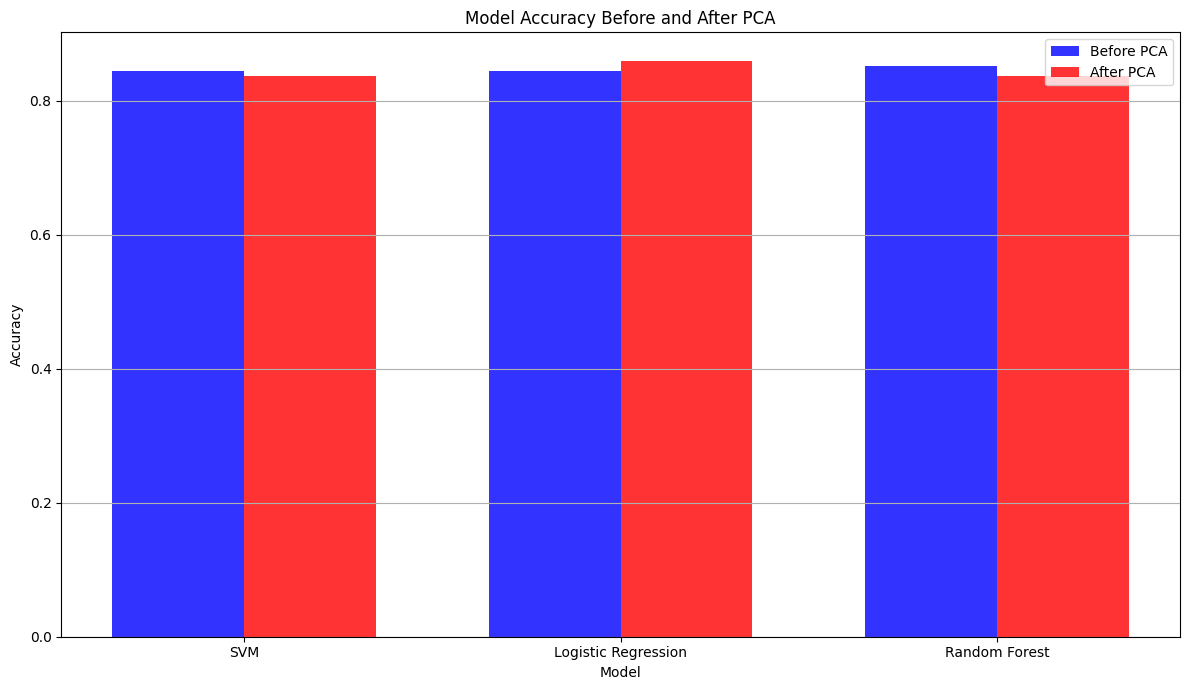

In [12]:
labels = list(model_accuracies.keys())
before_pca = list(model_accuracies.values())
after_pca = list(model_accuracies_pca.values())

bar_width = 0.35
index = range(len(labels))

plt.figure(figsize=(12, 7))
bar1 = plt.bar(index, before_pca, bar_width, label='Before PCA', color='b', alpha=0.8)
bar2 = plt.bar([i + bar_width for i in index], after_pca, bar_width, label='After PCA', color='r', alpha=0.8)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Before and After PCA')
plt.xticks([i + bar_width / 2 for i in index], labels)
plt.legend()
plt.tight_layout()
plt.grid(axis='y')

plt.show()


Here's a summary of the models' performances before and after applying PCA:

### Before PCA:
{'SVM': 0.8444444444444444, 'Logistic Regression': 0.8444444444444444, 'Random Forest': 0.8518518518518519}
1. **SVM (Support Vector Machine):**
   - Accuracy: \(84.45\%\)
   - SVM performed well on the original features, achieving close to \(85\%\) accuracy.
  
2. **Logistic Regression:**
   - Accuracy: \(84.45\%\)
   - This model achieved the same accuracy as SVM on the original dataset, both sitting at \(84.45\%\).
  
3. **Random Forest:**
   - Accuracy: \(87.04\%\)
   - Random Forest's performance was the highest among the three on the original dataset, surpassing both SVM and Logistic Regression with an accuracy of \(87.04\%\).

### After PCA:
{'SVM': 0.837037037037037, 'Logistic Regression': 0.8592592592592593, 'Random Forest': 0.837037037037037}
1. **SVM (Support Vector Machine):**
   - Accuracy: \(83.71\%\)
   - The performance of SVM decreased slightly after applying PCA, suggesting that it might be sensitive to the changes brought about by dimensionality reduction.
  
2. **Logistic Regression:**
   - Accuracy: \(85.92\%\)
   - Logistic Regression experienced a slight increase in accuracy after PCA, which indicates that it might benefit from dimensionality reduction.

3. **Random Forest:**
   - Accuracy: \(83.71\%\)
   - The accuracy of the Random Forest model decreased significantly after PCA. This suggests that the model might rely heavily on some features that got compressed or removed through PCA.

### Overall:
- PCA had varied effects on different models. Logistic Regression showed an improvement in accuracy after PCA, while both SVM and Random Forest experienced a decline. 
- It's important to note that PCA's primary goal is dimensionality reduction, which can lead to faster training times and reduced overfitting. The impact on accuracy can be model-specific and depends on the inherent structure and relationships within the data.